In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('data/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Data

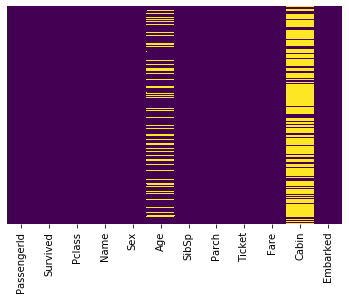

In [4]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap="viridis")

## Survived Data

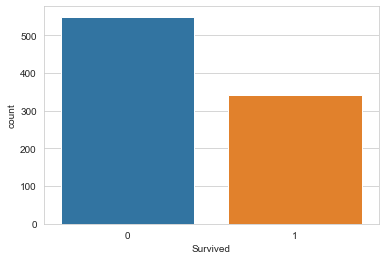

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

## Survived by sex

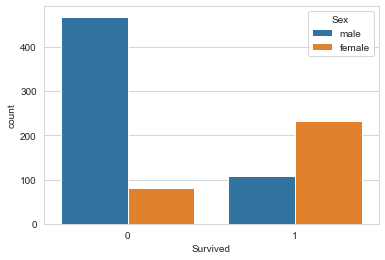

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

## Survived according to class

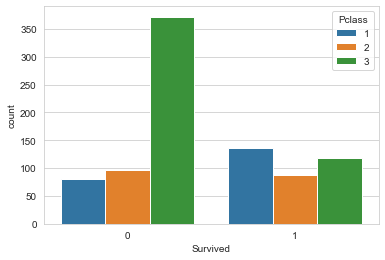

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

## Passengers by age

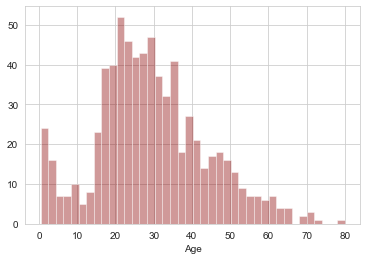

In [8]:
sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=40)

## Count of people who have siblings and spouse

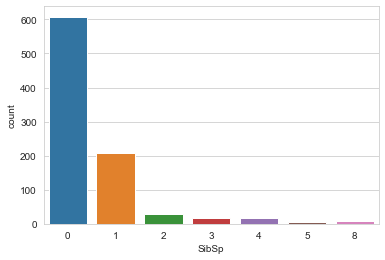

In [9]:
sns.countplot(x='SibSp', data=train)

## Passengers distribution by fair

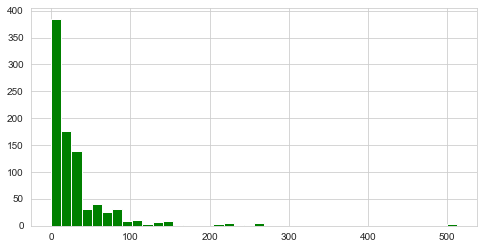

In [10]:
train['Fare'].hist(color='green', bins=40, figsize=(8,4))

## Data Cleaning

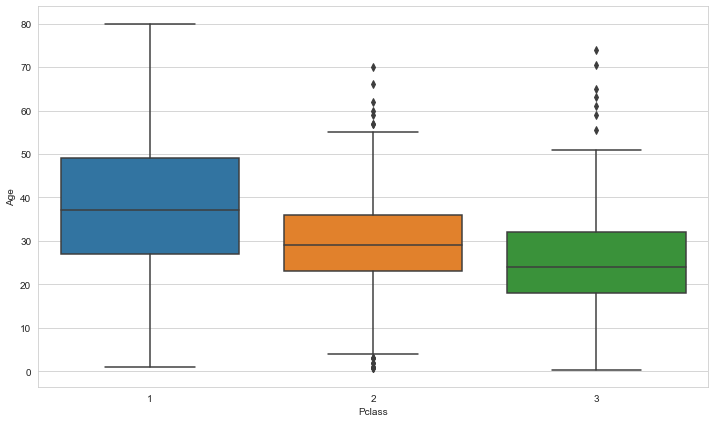

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [12]:
# Older passengers tend to be olders

## Filling the missing values in age

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

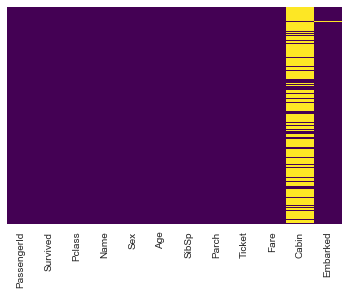

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Droping Cabin column

In [18]:
train.drop('Cabin', axis=1,inplace=True)

In [20]:
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


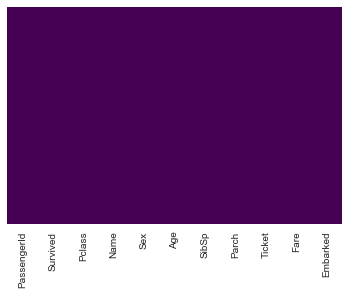

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Converting Categorical Features

In [22]:
# Categorical features needs to be convertied to dummy variables for machine learning algorithms

In [31]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
# sex = pd.get_dummies(train['Sex'])
# embark = pd.get_dummies(train['Embarked'])

In [32]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [34]:
train = pd.concat([train,sex,embark],axis=1)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression model

## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis =1),
                                                   train['Survived'], test_size=0.30,
                                                   random_state=101)

## Training and Predicting

In [45]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
predictions = logmodel.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
accuracy=confusion_matrix(y_test, predictions)

In [51]:
accuracy

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy=accuracy_score(y_test, predictions)
accuracy

0.8202247191011236